In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
import sklearn
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [8]:
#print(housing.feature_names)
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [11]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42) #here we are splitting 
# the complete data and target into train and test, such that train(first) gets 75% and test(second) gets 25%.
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42) #here we are splitting the 
# remaining data in X_train_full into X_train(75%) and X_valid(25%). Same for y_train_full.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [14]:
np.random.seed(42)
tf.random.set_seed(42)
X_train.shape

(11610, 8)

In [20]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(300,activation="relu",input_shape=X_train.shape[1:])
# Incase we don't lnow the input_shape

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])
# mae=mean absolute error

In [23]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 0s 903us/step - loss: 1.8542 - mae: 0.9889 - val_loss: 1.3779 - val_mae: 0.7073
Epoch 2/20
363/363 [==============================] - 0s 617us/step - loss: 0.7854 - mae: 0.6648 - val_loss: 0.6885 - val_mae: 0.6238
Epoch 3/20
363/363 [==============================] - 0s 646us/step - loss: 0.6817 - mae: 0.6182 - val_loss: 0.6645 - val_mae: 0.5892
Epoch 4/20
363/363 [==============================] - 0s 600us/step - loss: 0.6283 - mae: 0.5894 - val_loss: 0.5944 - val_mae: 0.5685
Epoch 5/20
363/363 [==============================] - 0s 668us/step - loss: 0.5868 - mae: 0.5671 - val_loss: 0.5505 - val_mae: 0.5434
Epoch 6/20
363/363 [==============================] - 0s 657us/step - loss: 0.5510 - mae: 0.5486 - val_loss: 0.5211 - val_mae: 0.5268
Epoch 7/20
363/363 [==============================] - 0s 682us/step - loss: 0.5225 - mae: 0.5324 - val_loss: 0.5055 - val_mae: 0.5115
Epoch 8/20
363/363 [==============================] - 0s 595us

In [24]:
mae_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 424us/step - loss: 0.3921 - mae: 0.4530


In [25]:
model_history.history

{'loss': [1.8542078733444214,
  0.785382091999054,
  0.6816678643226624,
  0.6283110976219177,
  0.5868017077445984,
  0.5509713888168335,
  0.5225090384483337,
  0.4993252456188202,
  0.480297327041626,
  0.4649343490600586,
  0.45277634263038635,
  0.44250085949897766,
  0.4341649115085602,
  0.42694541811943054,
  0.42081600427627563,
  0.4154335558414459,
  0.41089102625846863,
  0.40700259804725647,
  0.40306591987609863,
  0.40015295147895813],
 'mae': [0.9888760447502136,
  0.6648111939430237,
  0.6181755065917969,
  0.589396595954895,
  0.5670577883720398,
  0.5485936403274536,
  0.5324201583862305,
  0.5192217230796814,
  0.5080675482749939,
  0.49851754307746887,
  0.4899028539657593,
  0.4836655855178833,
  0.47857680916786194,
  0.4731330871582031,
  0.4695865213871002,
  0.4662388563156128,
  0.4627822935581207,
  0.46007537841796875,
  0.45713669061660767,
  0.4550018310546875],
 'val_loss': [1.3779263496398926,
  0.6885382533073425,
  0.6645382046699524,
  0.594353020191

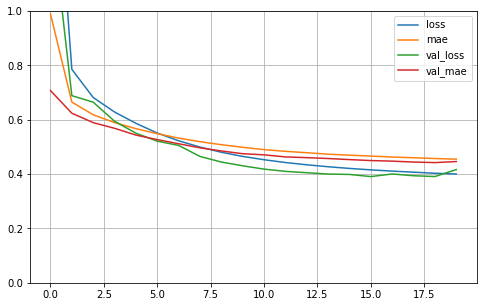

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
X_new=X_test[:5]

In [29]:
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:5])

[[0.80196786]
 [1.7406121 ]
 [3.4323983 ]
 [2.6267586 ]
 [2.9058843 ]]
[0.477   0.458   5.00001 2.186   2.78   ]
